# [MCB 32]: Lab 09 - Diabetes Classifcation

### Professor Robin Ball


In this lab, we will be exploring a data set on diabetes in an attempt to find out which health measurements are correlated the most with diabetic patients. After we establish the relationships between these measurments and diabetes, we will build a classifier that will, given a certain patient's health measurements, classify whether that patient has diabetes or not. 

### Table of Contents

## The Setup

The first thing we need to do is set up our environment so we can build tables and visualize the data, so just run the next cell.

In [1]:
from datascience import *
import numpy as np
import matplotlib as plt
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
plt.style.use('fivethirtyeight')

Then we will load in the data on the patients into a table in the next cell.

It is important to understand what the information inside of our table is, such as the columns, rows and individual entries. Each row corresponds to a particular patient and the health measurements that, that patient had recorded druring the gathering of the data. As a reminder, here is a breakdown of the columns in our table.

Variable       | Description
-------------- | ------------------------------------------------------------------
Pregnancies | The number of pregnancies the patient has had
Glucose | Plasma glucose concentration 2 hours into test
BloodPressure | Diastolic Blood Pressure (mm Hg)
SkinThickness | Triceps skin fold thickness (mm)
Insulin | 2-hour serum insulin
BMI | Body mass index (weight in kg/(heigth in meters)^2)
DiabetesPedigreeFunction | A function which extrapolates the genetic risk a patient has of getting diabetes based on history of the disease in family/relatives
Age | Age of patient (years)
Outcome | Distinguishes if patient has diabetes or not. 0 : NO, 1 : Yes


In [2]:
diabetes = Table().read_table("diabetes.csv")

In [3]:
diabetes

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1


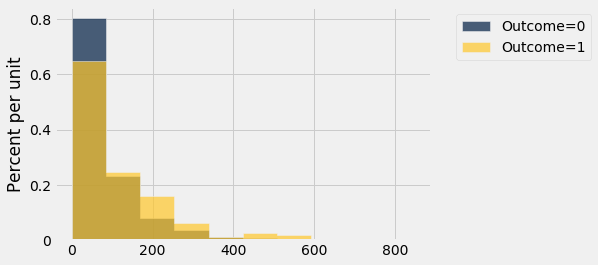

In [5]:
diabetes.hist("Insulin", group = "Outcome")

## Conceptual Background

Before we dig into the dataset that we have, now is a good time to delve further into the idea of classification and, more generally, machine learning.

The next section is dense so it might be helpful to walk through the concepts with a partner or in a group.

Machine learning is a school of thought which generally tries to make accurate models and predictions about the world using data. Machine learning algorithms can become quite complex, to the point where an algorithm can start to learn from data on its own. In today's lab, we will be implementing a machine learning model which uses supervised learning (aka human intervention) to improve it throughout the model-building process. The model we will be building with our data is a classifier.

Classification is a type of machine learning and modeling which takes in certain inputs or data about a subject and tries to predict which category or group that certain data point or subject lies in based on data or knowledge we already have. The knowledge that it generally relies on, is that it uses a dataset of subjects that we already know the categories or classifications for. The categories or classes for our data are diabetic and non-diabetic. We already have a dataset of individuals for whom we know if a particular individual is diabetic or not.

Our classifier will use a K-nearest neighbors algorithm to classify an input as diabetic or non-diabetic. Please don't get too caught up on the scary name. Essentially, this process finds the closest individuals in our dataset to the new individual we are trying to classify. It does this by calculating distances between our individual of interest's health measurements and the health measurements of all the individuals in the dataset. Once it has these k-closest individuals, it can then classify our new individual as diabetic or non-diabetic based on the classifications of the individuals we found are closest to him or her.

Here is an example: 

Say I am trying to classify Natalie with a 3-Nearest Neighbor classifier and find that her three neearest neighbors in my dataset are Jose, Kimberly, and Luke. I know that Luke and Kimberly have diabetes and that Jose doesn't because they are in my dataset of people who I know the classification of. Because a majority of the three nearest neighbors to Natalie are diabetic, I would then classify Natalie as diabetic.

<div class="alert alert-info">
**QUESTION**: Classify Adel based on the following information and put your answer into the quotations for the variable adel_classification 
</div>


I find that Adel's 5-nearest neighbors are Tracy, Hanh, Jordan, Justin, and Sam. Sam and Tracy have diabetes, but Jordan, Justin, and Hanh do not. How should I classify Adel?

In [5]:
adel_classification = ""

In [6]:
diabetes.group("Outcome")

Outcome,count
0,500
1,268


Now is a good time to take a deeper look at the data we have for diabetes and see if we can see any problems with the data, and if it can be transformed in any way to make out classification more accurate.

In [7]:
diabetes

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1


One problem with the data is that the different columns or health measurements we take on an individual have different scales. For example, Glucose has numbers in the hundreds, Age in the tens, and The Diabetes Pedigree Function is a number between 0 and 1. Could this be a problematic feature of our data set, given we are measuring the distances between two individuals with these health measurements?

The problem with having different scales when we are calculating distance between two people is that two people could be relatively closer in their Glucose measurement than their Diabetes Pedigree Function (DPF) score. For example, say we have two pairs of people and we just have their Glucose and DPF data in the form (Glucose, PDF). The first pair of people have data of (140, 0) (150, 1) and the second pair of people have data of (140, 0.350), (153, 0.352). The first pair has a distance of $\sqrt101$ but the second pair has a distance of approximately $\sqrt169$. What we aren't taking into account is that a distance of 1 in DPF scores is actually very significant because its the biggest possible distance you can have in DPF scores, but the second pair's distance in Glucose is three larger than the first pair's, which our distance calculation is putting a lot of weight on, even though its not that significant of a difference in Glucose levels. The second pair should actually be closer because their DPF scores are almost identical, and their glucose measurements are much further off then the first pairs. 

One way we can account for this is to just put all of the data into standard units. Essentially, instead of having the raw data we put the number of standard deviations that a specific entry is above or below the mean of the data in that column. This will make sure all data points are in a range of numbers from about -3 to 3. Once we do this we will no longer have any issues with scaling for our distance calculations

In [8]:
def standard_units(x):
    mean = np.mean(x)
    std = np.std(x)
    normalized_x = (x - mean)/std
    return normalized_x

In [9]:
outcomes = diabetes.column("Outcome")
diabetes_std = util.table_apply(diabetes, standard_units)
diabetes_std = diabetes_std.drop("Outcome")
diabetes_std = diabetes_std.with_column("Outcome", outcomes)
diabetes_std

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.639947,0.848324,0.149641,0.90727,-0.692891,0.204013,0.468492,1.426,1
-0.844885,-1.1234,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
1.23388,1.94372,-0.263941,-1.28821,-0.692891,-1.10326,0.604397,-0.105584,1
-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.04155,0
-1.14185,0.504055,-1.50469,0.90727,0.765836,1.40975,5.48491,-0.0204964,1
0.342981,-0.153185,0.253036,-1.28821,-0.692891,-0.811341,-0.818079,-0.27576,0
-0.250952,-1.34248,-0.98771,0.719086,0.0712043,-0.125977,-0.676133,-0.616111,1
1.82781,-0.184482,-3.5726,-1.28821,-0.692891,0.419775,-1.02043,-0.360847,0
-0.547919,2.38188,0.0462453,1.53455,4.02192,-0.189437,-0.947944,1.68126,1
1.23388,0.128489,1.39039,-1.28821,-0.692891,-4.06047,-0.724455,1.76635,1


Now that we have an idea of how our classification works and we've fixed our data, how will we know how well our classifier works? In order to know this, we would have to have access to new data which we have not created our classifier with and that still has the known classification of the individuals in it. We could go scouring the internet for a new data set, but luckily data scientists have come up with a clever trick to get around this.

The idea is to split up the data set we already have into what are called training and testing sets. The training set will be larger and will consist of the data that we use to create our classifier while the testing set will not be accessed or viewed until we want to test how well our classifier works. Because we know the classification of everyone in our data set already, we will know whether or not a certain individual has diabetes or not in our testing set. Then we will try to classify everyone in our testing set with our classifier and see how accurate or how often our classifier makes the right prediction.

The next cell calls a function on our table, .split(k), which will automatically split our tables into one with k rows that are randomly sampled from the original table and one table with the rest of the rows in our original table. We usually want between 10-30% of our data in the testing set and the rest in the training.

In [10]:
diabetes_testing, diabetes_training = diabetes_std.split(170)

In [11]:
diabetes_training.num_rows, diabetes_testing.num_rows

(598, 170)

Now that we finally have an understanding of classification and a training data set we can build our classifier with, we can finally start to build it. From now on we will be exclusively using our training set to build our model.

What we need to figure out, is which health measurements in our data will give us the most accurate classifications. We can do this by finding out which variables have the biggest difference between people with diabetes and people without diabetes. One thing we can check is a difference in means between the two groups of people.

In [12]:
diabetes_training.select("BloodPressure", "Outcome").group("Outcome", np.mean)

Outcome,BloodPressure mean
0,-0.0158722
1,0.0695215


What we did in the above cell is select the BloodPressure and Outcome columns in our table (remember outcome has two possible values, 0 and 1 for non-diabetic and diabetic), and then we grouped by outcome. What this does is separate out entries into the different unique values for that column. So for our table, our entries are split into the groups of people who have 0 and 1 for their outcome value. We also pass in a function np.mean into the group method. Passing in this function, np.mean, tells the computer how it should aggregate the BloodPressure entries in each group. Therefore, np.mean tells the computer to find the mean BloodPressure of each of these groups. So the second column conatins the means for each group, 0 and 1.

Remember that our variables are in standard units now, so the values indicate how many standard deviations above and below the mean each respective group is on average. If you are unfamiliar with this terminology, then just think of a standard unit as a measure of how high or below a specific number is with respect to the mean. A number that is negative is below the mean, a number that is positive is above the mean. Numbers that are close to zero are close to the mean with respect to that group of data. About as far as a number can get from the mean is 3 or -3 (usually), with 3 being a number very high above the mean and -3 being a number very below the mean.

For our table above we see group 0 has an average of -0.0685657 meaning, on average, non-diabetic patients have a Bloodpressure below the mean BloodPressure for everyone in the training data. And the other mean for group 1 is 0.0584094, meaning the average person with diabetes has a BloodPressure above the same mean. Both values are pretty close to zero though, so there isn't that big of a difference in means between the two groups.

<div class="alert alert-info">
**QUESTION**: Now try finding the mean of different health measurements for each group, 0 and 1, in our training data. Try doing it for the "Age" column and the "BMI" column. (Hint: look at where we passed the "BloodPressure" column label in the previous line of code) Observe if the means are above or below zero and how far above and below zero they are for each group.
    </div>

In [13]:
bmi_means = ...
bmi_means

Ellipsis

In [14]:
age_means = ...
age_means

Ellipsis

Seeing a difference in the mean between the two groups of those who are diabetic and those who are not in our training data is helpful in deciding which health measurements have the biggest disparities between those two groups. However, it is not that intuitive or easy to see and it might be better to try to visualize the data. If we could see the distribution of the health measurements for the different groups then it might be easier to decide which health measurements seem to be the biggest difference makers between diabetic and non-diabetic patients. 

Luckily, we have a tool that we have seen before called a histogram which places our data into bins. Each bin has a height which is a percentage of the data in that bin and a width which is the range of the data in that bin. This information is not too important and you don't have to completely understand the intricacies of a histogram. What is important to see is that larger or taller bars have more of the data in them and that the histogram overall shows the distribution of the data. Therefore, if we create a histogram for each group for say BloodPressure then we can see a more complete picture of how diabetic and non-dabetic people differ in BloodPressure.

In [15]:
#diabetes.group("SkinThickness")
diabetes.group("Insulin")

Insulin,count
0,374
14,1
15,1
16,1
18,2
22,1
23,2
25,1
29,1
32,1


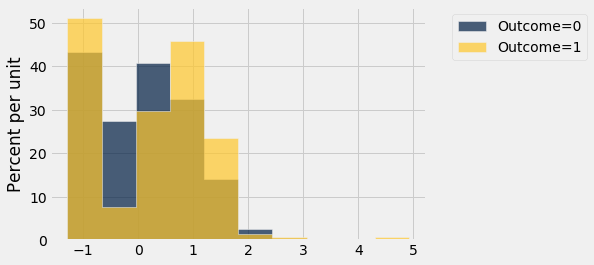

In [16]:
diabetes_training.select("SkinThickness", "Outcome").hist(group="Outcome")

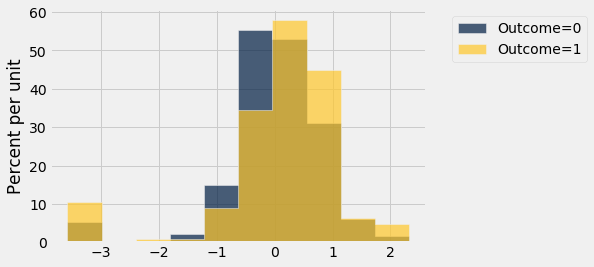

In [17]:
diabetes_training.select("BloodPressure", "Outcome").hist(group="Outcome")

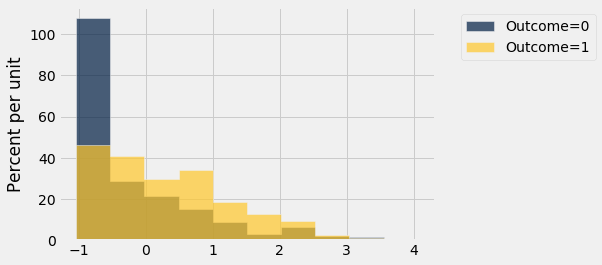

In [18]:
diabetes_training.select("Age", "Outcome").hist(group="Outcome")

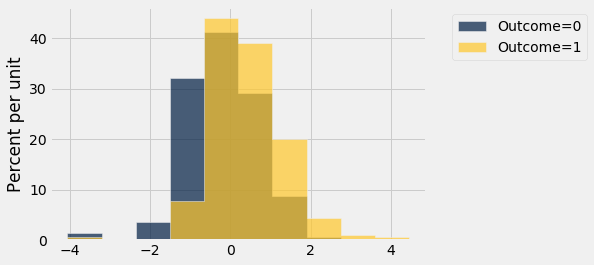

In [19]:
diabetes_training.select("BMI", "Outcome").hist(group="Outcome")

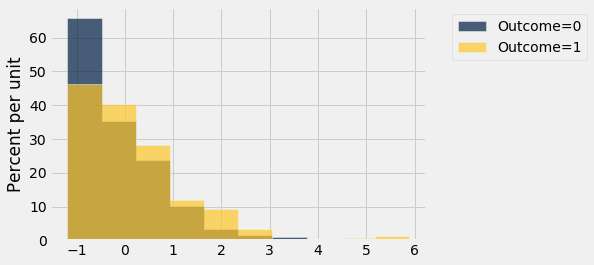

In [20]:
diabetes_training.select("DiabetesPedigreeFunction", "Outcome").hist(group="Outcome")

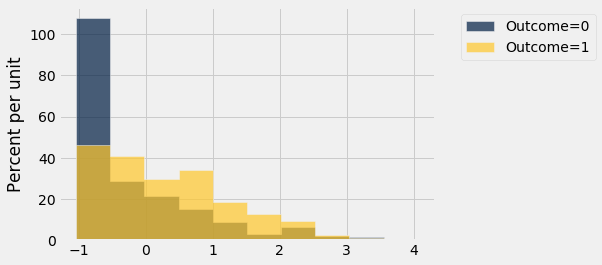

In [21]:
diabetes_training.select("Age", "Outcome").hist(group="Outcome")

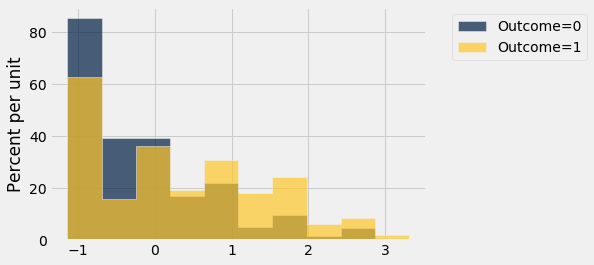

In [22]:
diabetes_training.select("Pregnancies", "Outcome").hist(group="Outcome")

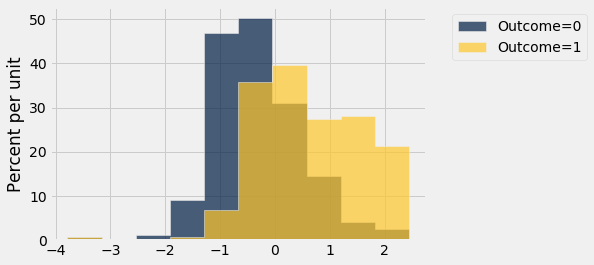

In [23]:
diabetes_training.select("Glucose", "Outcome").hist(group="Outcome")

In [24]:
def get_distance(x, y):
    return np.sqrt(np.sum((x-y)**2))

In [25]:
np.array(diabetes_training.rows)

array([[ 0.04601433, -0.12188771, -0.26394125, ..., -0.73049514,
        -0.78628618,  0.        ],
       [ 0.93691372, -0.46615631,  1.18359575, ..., -0.71539454,
         1.2558199 ,  0.        ],
       [-0.84488505, -0.90431634, -0.36733675, ...,  0.03057477,
        -0.70119842,  0.        ],
       ...,
       [-1.14185152, -0.59134489, -0.88431425, ..., -1.18955318,
        -1.04154944,  0.        ],
       [-0.54791859, -1.24858494,  0.14964075, ...,  0.22688248,
        -0.70119842,  0.        ],
       [ 0.63994726, -0.184482  , -0.47073225, ..., -0.68519336,
         0.57511787,  1.        ]])

In [26]:
def get_k_nearest(test, table, k):
    x = test.rows
    x_array = np.array(x)
    nbrs = NearestNeighbors(n_neighbors=k).fit(np.array(table.rows))
    distances, indices = nbrs.kneighbors(x_array)
    return distances, indices
    

In [27]:
get_k_nearest(diabetes_testing, diabetes_training, 5)

(array([[0.7573642 , 1.7458861 , 1.76159026, 1.81279021, 1.84655129],
        [0.70413426, 0.82560928, 0.83970694, 1.09100878, 1.09232116],
        [1.16688118, 1.36012452, 1.38422883, 1.40600064, 1.40839491],
        [1.07988096, 1.32118617, 1.45474477, 1.48238883, 1.58458504],
        [0.70205959, 0.93078949, 1.19063909, 1.22387492, 1.26275134],
        [0.64027093, 1.31048369, 1.66673533, 1.79184751, 1.80993314],
        [0.84550914, 1.08653934, 1.15171952, 1.16010856, 1.2269853 ],
        [0.80368025, 1.10433049, 1.14730028, 1.1784709 , 1.3666676 ],
        [1.35987191, 1.55898546, 1.60881553, 1.63793774, 1.65232463],
        [0.76155774, 1.10691939, 1.11286813, 1.12039126, 1.14257025],
        [0.84305593, 1.19970977, 1.21299057, 1.34489929, 1.3727488 ],
        [1.34656764, 1.39482357, 1.52644239, 1.65132448, 1.66849493],
        [1.82628618, 1.84292768, 1.87170684, 1.9387612 , 1.98349061],
        [1.026822  , 1.18640422, 1.19049968, 1.22752569, 1.24600227],
        [0.76219574,

In [28]:
def classifier_accuracy(table, test, k):
    distance, indices = get_k_nearest(test.drop("Outcome"), table.drop("Outcome"), k)
    rows = table.rows
    num_right = 0
    classifications = []
    test_rows = test.rows
    for index in indices:
        classes_nearest = []
        diabetes_count = 0
        for i in index:
            classes_nearest += [rows[i][-1]]
        for elem in classes_nearest:
            if elem == 1:
                diabetes_count += 1
        if diabetes_count > k/2:
            classifications += [1]
        else:
            classifications += [0]
    for i in range(len(classifications)):
        if classifications[i] == test_rows[i][-1]:
            num_right += 1
    return num_right/len(test_rows)

In [30]:
diabetes_training_best = diabetes_testing.select("Age", "Glucose", "BMI", "Outcome")
diabetes_testing_best = diabetes_training.select("Age", "Glucose", "BMI", "Outcome")
classifier_accuracy(diabetes_training_best, diabetes_testing_best, 9)

0.745819397993311

In [ ]:
get_k_nearest(diabetes_testing, diabetes_training, k)

In [ ]:
diabetes_std.where('Outcome', 0).hist('Insulin')
diabetes_std.where('Outcome', 1).hist('Insulin')

In [ ]:
diabetes_std.where("Outcome", 0).hist('Pregnancies')
diabetes_std.where("Outcome", 1).hist('Pregnancies')

In [ ]:
diabetes_std.where("Outcome", 0).hist('BloodPressure')
diabetes_std.where("Outcome", 1).hist('BloodPressure')

In [ ]:
diabetes_std.where("Outcome", 0).hist('Glucose')
diabetes_std.where("Outcome", 1).hist('Glucose')

In [ ]:
diabetes.where("Outcome", 0).hist('DiabetesPedigreeFunction')
diabetes.where("Outcome", 1).hist('DiabetesPedigreeFunction')

In [ ]:
diabetes.where("Outcome", 0).hist('BMI')
diabetes.where("Outcome", 1).hist('BMI')

In [ ]:
diabetes.where("Outcome", 0).hist('Age')
diabetes.where("Outcome", 1).hist('Age')

In [ ]:
diabetes.group('Insulin')

In [ ]:
diabetes.group('BMI')

In [ ]:
diabetes.group('Outcome', np.mean)

In [ ]:
diabetes.where('Insulin', 0).group(['Outcome', 'Insulin'])